### Importing the necessary libraries and packages

In [2]:
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.preprocessing import StandardScaler # data preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_error # accuracy metric
import numpy as np # data processing
import pandas as pd # data processing 
import matplotlib.pyplot as plt # data plotting
import seaborn as sb # data plotting

### Importing the csv file as a dataFrame

In [3]:
df = pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Now taking 2 parts from the dataset:
#### X : which contains all the data except the <b>target</b> column<br>y : which contains only the <b>target</b> column 

In [4]:
X = df.loc[:,["age"]]
y = df.loc[:,["trestbps"]]
print("//Independent features//")
print(X.head())
print("\n\n//Dependent feature//")
print(y.head())

//Independent features//
   age
0   63
1   37
2   41
3   56
4   57


//Dependent feature//
   trestbps
0       145
1       130
2       130
3       120
4       120


### Split the X and y dataframes for test and training

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

### Scaling the dataset

In [6]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Random Forest Regression

In [7]:
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
# printing the r2_score of regression
print("The coefficient of determination :", r2_score(y_test,y_pred))

The coefficient of determination : -0.12489381397388355


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Plotting the Regression line

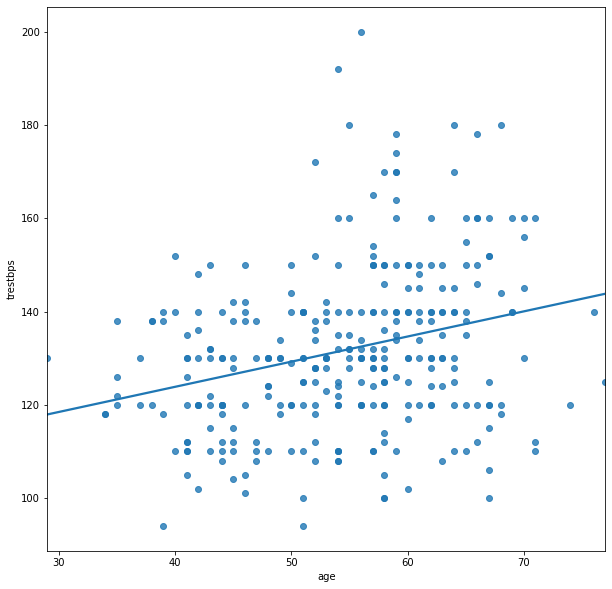

In [8]:
plt.figure(figsize=(10, 10))
sb.regplot(x=X, y=y, data=df,ci=None)

### Calculating the errors

In [9]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15.449749146947559
Mean Squared Error: 370.2295050746706
Root Mean Squared Error: 19.241348837196174
